In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
train = pd.read_csv(r'..\data\final_train_data.csv')

In [4]:
test = pd.read_csv(r'..\data\final_test_data.csv')

In [5]:
# train['Survived']

In [6]:
train.shape

(891, 41)

In [7]:
test.shape

(418, 40)

## `Splitting into X_train and Y_train`

### Training Data

In [8]:
X= train.drop(labels='Survived',axis=1)

In [9]:
X.shape

(891, 40)

In [10]:
y= train['Survived']

In [11]:
from sklearn.model_selection import train_test_split

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

## `Scaling`

In [13]:
from sklearn.preprocessing import StandardScaler

### Training Data

In [14]:
scaler = StandardScaler()
scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.transform(X_test)

### Test Data

In [15]:
scaled_test = scaler.transform(test)

## `Apply AdaBoost model `


In [16]:
from sklearn.ensemble import AdaBoostClassifier
model = AdaBoostClassifier()
model.fit(scaled_X_train,y_train)

AdaBoostClassifier()

In [17]:
# print(classification_report(y_test,predictions))

In [18]:
model.feature_importances_

array([0.16, 0.38, 0.02, 0.02, 0.  , 0.  , 0.  , 0.02, 0.04, 0.  , 0.02,
       0.02, 0.02, 0.04, 0.  , 0.02, 0.  , 0.  , 0.  , 0.02, 0.02, 0.  ,
       0.04, 0.02, 0.  , 0.02, 0.  , 0.04, 0.  , 0.02, 0.  , 0.02, 0.02,
       0.  , 0.  , 0.  , 0.  , 0.02, 0.  , 0.  ])

In [19]:
model.feature_importances_.argmax()

1

## `Calculate Accuracy`

In [20]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,plot_confusion_matrix
y_pred = model.predict(scaled_X_test)
accuracy_score(y_test,y_pred)

0.7821229050279329

In [29]:
accuracy_score(y_train,model.predict(scaled_X_train))

0.8525280898876404

In [21]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.78      0.84      0.81        99
           1       0.78      0.71      0.75        80

    accuracy                           0.78       179
   macro avg       0.78      0.78      0.78       179
weighted avg       0.78      0.78      0.78       179



In [22]:
confusion_matrix(y_test,y_pred)

array([[83, 16],
       [23, 57]], dtype=int64)

c:\Users\kul78\.conda\envs\data_science\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


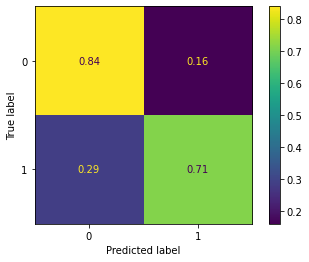

In [23]:
plot_confusion_matrix(model,scaled_X_test,y_test,normalize='true')

## `Predicting the Test Data`

In [24]:
test_pred = model.predict(scaled_test)

In [25]:
submission = pd.read_csv(r'..\Kagle_submissions\gender_submission.csv')

In [26]:
submission["Survived"]=test_pred

In [27]:
submission.shape

(418, 2)

In [28]:
submission.to_csv(r"..\Kagle_submissions\AdaBoost.csv",index=False)